In [66]:
import pandas as pd
import numpy as np
file_path="car_price_dataset.csv"
data=pd.read_csv(file_path)
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [67]:
# Check for missing values
print(data.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [68]:
# Drop missing values (if any)
data = data.dropna()


In [69]:
# Select features (Independent variables) and target (Dependent variable)
X = data.drop(columns=["Price"])  # Assuming 'price' is the target variable
y = data["Price"]

In [70]:
# Check data types
print(data.dtypes)

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object


In [71]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Brand','Model','Fuel_Type','Transmission']

label_encoders = {} 

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  
    label_encoders[col] = le 


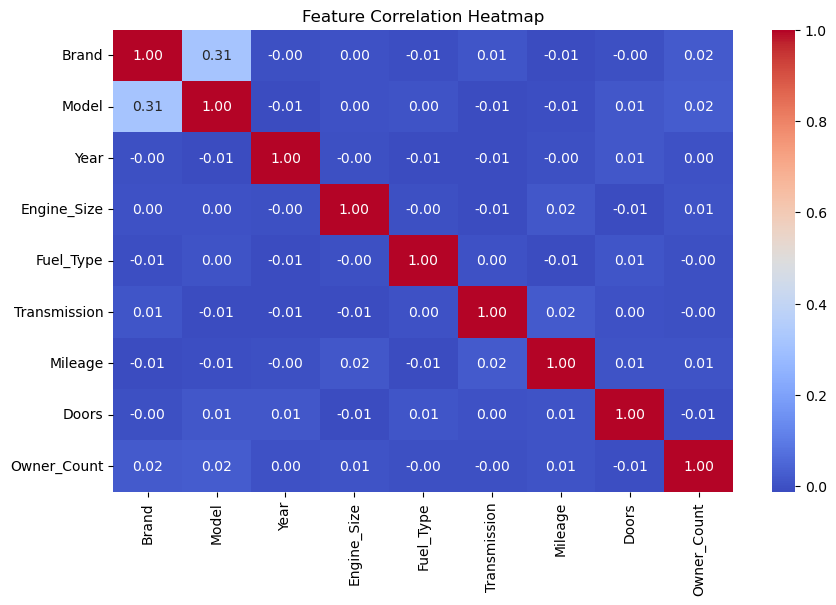

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [73]:
# Split into Training and Testing Data (80% Train, 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [74]:
X_train.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
9254,9,17,2007,3.2,2,2,33948,5,4
1561,1,1,2010,4.8,1,2,224853,2,1
1670,5,25,2006,1.9,2,2,13435,3,5
6087,4,6,2019,1.7,0,2,199846,2,3
6669,7,10,2005,3.6,3,0,261,3,2


In [75]:
from sklearn.preprocessing import StandardScaler

num_features = ['Year','Engine_Size','Mileage','Doors','Owner_Count']
scaler = StandardScaler()
X_train[num_features]=scaler.fit_transform(X_train[num_features])
X_test[num_features]=scaler.transform(X_test[num_features])

In [76]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predictions
y_pred_linear = linear_model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")

Linear Regression - MSE: 818588.25, R²: 0.91


In [81]:
from sklearn.linear_model import Ridge
# Ridge Regression with alpha=1.0
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Model Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")


Ridge Regression - MSE: 818562.11, R²: 0.91


In [126]:
# Lasso Regression with alpha=0.1


Lasso Regression - MSE: 818443.04, R²: 0.91


In [129]:
## cross validation for over fitting ,Thus in this model all have similar or same r2 value and cross - validation is also asame so this is the best fit

In [82]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cross_val_scores)
print("Mean R²:", cross_val_scores.mean())

Cross-Validation R² Scores: [0.91343073 0.91718142 0.91601444 0.9115473  0.92155173]
Mean R²: 0.9159451239756995


In [83]:
# Concatenate X_train and y_train for correlation analysis
train_data = pd.concat([X_train, y_train], axis=1)

# Compute correlation of all features with target variable
correlation_with_target = train_data.corr()["Price"].sort_values(ascending=False)  # Assuming "Price" is the target

# Display correlation values
print(correlation_with_target)

Price           1.000000
Year            0.663176
Engine_Size     0.362010
Model           0.007098
Doors           0.004508
Brand           0.002276
Owner_Count    -0.000079
Fuel_Type      -0.042013
Transmission   -0.227229
Mileage        -0.551387
Name: Price, dtype: float64


In [84]:
X_train=X_train.drop(columns=['Owner_Count','Doors','Fuel_type','Brand'],errors="ignore")
X_test=X_test.drop(columns=['Owner_Count','Doors','],errors="ignore")

In [85]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")


Lasso Regression - MSE: 818738.64, R²: 0.91


In [86]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage'],
      dtype='object')
Columns in X_test: Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage'],
      dtype='object')
